## 미니배치 경사 하강법 (Mini-batch Gradient Descent)

미니배치 경사 하강법은 배치 경사 하강법과 확률적 경사 하강법(SGD)의 장점을 절충한 방식이다. **전체 데이터를 '미니배치'라 불리는 작은 묶음으로 나누고, 각 미니배치 단위로 기울기를 계산하여 파라미터를 업데이트**한다. 이를 통해 배치 경사 하강법의 안정성과 SGD의 빠른 계산 속도라는 두 가지 장점을 모두 취할 수 있어, 현대 딥러닝에서 가장 널리 사용되는 표준적인 최적화 기법이다.

### 기본 설정
예시에 필요한 `numpy`와 `matplotlib` 라이브러리를 임포트.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 예시 데이터 준비
이전 예제들과 동일하게, 선형 관계(`y = 2x + 1`)를 갖는 데이터를 생성.

In [2]:
# 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1) # y = 1 + 2x + noise

# 데이터 확인 (첫 5개)
print("X (입력) 샘플:\n", X[:5])
print("y (정답) 샘플:\n", y[:5])

X (입력) 샘플:
 [[0.28860407]
 [0.36324297]
 [1.39755645]
 [0.72383434]
 [0.24611509]]
y (정답) 샘플:
 [[3.10419156]
 [3.83174503]
 [3.40171043]
 [1.6808559 ]
 [0.11664545]]


### 미니배치 경사 하강법 구현 및 모델 학습

미니배치 경사 하강법 알고리즘을 직접 구현하는 과정.

1. `w`, `b`를 임의의 값으로 초기화.
2. 각 epoch마다 **전체 데이터의 순서를 무작위로 섞음**.
3. 섞인 데이터를 지정된 `batch_size` 크기의 미니배치로 나눔.
4. 각 미니배치에 대해 기울기를 계산하고 `w`, `b`를 업데이트.
5. 모든 미니배치에 대한 업데이트가 끝나면 1 epoch이 완료. 이 과정을 반복.

In [3]:
# 하이퍼파라미터 설정
learning_rate = 0.05
n_epochs = 50
batch_size = 32 # 미니배치 크기 (보통 2의 거듭제곱 사용)

# 모델 파라미터(가중치, 편향) 초기화
w = np.random.randn(1, 1)
b = np.random.randn(1, 1)

# 데이터 개수
m = len(X)

print(f"초기 가중치 w: {w[0][0]:.4f}, 초기 편향 b: {b[0][0]:.4f}")

# 학습 과정
for epoch in range(n_epochs):
    # 1. 매 에포크마다 데이터 순서를 섞음
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    # 2. 미니배치 단위로 반복
    for i in range(0, m, batch_size):
        # 미니배치 데이터 선택
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        
        # 예측 및 오차 계산
        y_pred = np.dot(X_batch, w) + b
        error = y_pred - y_batch
        
        # 기울기 계산 (해당 미니배치에 대한 평균 기울기)
        gradient_w = (2/batch_size) * np.dot(X_batch.T, error)
        gradient_b = (2/batch_size) * np.sum(error)
        
        # 파라미터 업데이트
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b
        
    if (epoch + 1) % 10 == 0:
        # 전체 데이터에 대한 손실(MSE) 계산 (모니터링용)
        total_error = np.dot(X, w) + b - y
        loss = np.mean(total_error**2)
        print(f"Epoch {epoch+1:2d}: Loss = {loss:.4f}, w = {w[0][0]:.4f}, b = {b[0][0]:.4f}")

초기 가중치 w: -0.1523, 초기 편향 b: 0.2332
Epoch 10: Loss = 1.1110, w = 1.4921, b = 1.4495
Epoch 20: Loss = 1.1021, w = 1.5695, b = 1.3621
Epoch 30: Loss = 1.0987, w = 1.6164, b = 1.3074
Epoch 40: Loss = 1.0974, w = 1.6445, b = 1.2727
Epoch 50: Loss = 1.0970, w = 1.6620, b = 1.2526


### 학습 결과 확인

학습 완료 후의 최종 `w`와 `b`를 확인하여 실제 값(`w=2`, `b=1`)에 근사하는지 비교.

In [4]:
print("===== 학습 완료 ====")
print(f"최종 가중치 w: {w[0][0]:.4f}")
print(f"최종 편향 b: {b[0][0]:.4f}")
print("실제 값: w=2, b=1")

===== 학습 완료 ====
최종 가중치 w: 1.6620
최종 편향 b: 1.2526
실제 값: w=2, b=1


### 학습된 모델 시각화

원본 데이터와 미니배치 경사 하강법으로 학습된 선형 회귀 직선을 함께 시각화.

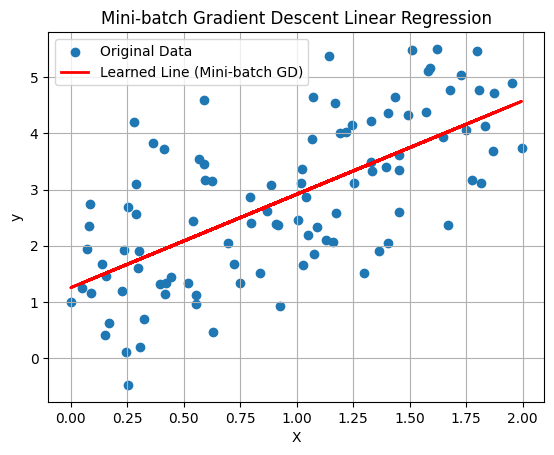

In [5]:
# 산점도로 원본 데이터 시각화
plt.scatter(X, y, label='Original Data')

# 학습된 선형 회귀선 시각화
y_pred_line = w * X + b
plt.plot(X, y_pred_line, color='red', linewidth=2, label='Learned Line (Mini-batch GD)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Mini-batch Gradient Descent Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

### 경사 하강법 종류별 비교

| 구분 | 배치 경사 하강법 (Batch GD) | 확률적 경사 하강법 (SGD) | 미니배치 경사 하강법 (Mini-batch GD) |
|---|---|---|---|
| **업데이트 당 데이터** | 전체 데이터셋 | 1개 샘플 | `N`개 샘플 (미니배치) |
| **업데이트 경로** | 매우 부드러움 | 매우 불안정 (지그재그) | 다소 불안정 (SGD보다 안정적) |
| **계산 속도 (1 epoch)** | 매우 느림 | 매우 빠름 | 빠름 |
| **메모리 사용량** | 매우 큼 | 매우 작음 | 작음 |
| **장점** | 안정적인 수렴 | 빠른 계산, 지역 최솟값 탈출 | 안정성과 효율성의 균형, **GPU 병렬처리**에 유리 |
| **단점** | 느리고 메모리 비효율적 | 불안정한 업데이트 | 배치 크기라는 추가 하이퍼파라미터 필요 |

### 한 문장 요약

미니배치 경사 하강법은 전체 데이터를 작은 묶음(미니배치)으로 나누어, 배치 경사 하강법의 안정성과 SGD의 효율성이라는 장점을 모두 취한 표준적인 최적화 방식이다.